In [1]:
library(plyr)

# Handle column containing percentages as strings ending in "%"
percentage <- function(s) {
  if (s == '' || s == '0 None')
    return(0)
  else
    return(as.numeric(strsplit(s, '%')))
}

# Read raw data
mv_data_raw <- read.csv('Mt_Vernon_Scouting.csv')

# Remove "%" characters and convert to numeric values
mv_data_raw[,'How.much.defense.played.'] <- mapply(percentage, as.vector(mv_data_raw[,'How.much.defense.played.']))

# Set empty cells to 0
mv_data_raw[is.na(mv_data_raw)] <- 0

mv_data <- ddply(mv_data_raw, .(Team..), summarize,
                 AvgCubesOwnSwitch = mean(X..cubes.on.our.switch.),
                 AvgCubesOppSwitch = mean(X..cubes.on.opponent.s.switch.),
                 AvgCubesScale = mean(X..cubes.on.scale.),
                 AvgCubesExchange = mean(X..cubes.into.exchange.),
                 AvgCubesTotal = sum(AvgCubesOwnSwitch, AvgCubesOppSwitch, AvgCubesScale, AvgCubesExchange),
                 AvgDefense = mean(How.much.defense.played.))

In [2]:
plot_scale_cubes <- function(match_data) {
  match_data <- arrange(match_data, desc(AvgCubesTotal))
  barplot(match_data[,'AvgCubesScale'], names=match_data[,'Team..'],
          xlab='Team', ylab='Avg Scale', main='Scale Cubes',
          col='darkgreen', las=2)
}

plot_own_switch_cubes <- function(match_data) {
  match_data <- arrange(match_data, desc(AvgCubesTotal))
  barplot(match_data[,'AvgCubesOwnSwitch'], names=match_data[,'Team..'],
          xlab='Team', ylab='Avg Own Switch', main='Own Switch Cubes',
          col='blue', las=2)
}

plot_opp_switch_cubes <- function(match_data) {
  match_data <- arrange(match_data, desc(AvgCubesTotal))
  barplot(match_data[,'AvgCubesOppSwitch'], names=match_data[,'Team..'],
          xlab='Team', ylab='Avg Opp Switch', main='Opp Switch Cubes',
          col='red', las=2)
}

plot_exchange_cubes <- function(match_data) {
  match_data <- arrange(match_data, desc(AvgCubesTotal))
  barplot(match_data[,'AvgCubesExchange'], names=match_data[,'Team..'],
          xlab='Team', ylab='Avg Exchange', main='Exchange Cubes',
          col='yellow', las=2)
}

plot_total_cubes <- function(match_data) {
  match_data <- arrange(match_data, desc(AvgCubesTotal))
  barplot(match_data[,'AvgCubesTotal'], names=match_data[,'Team..'],
          xlab='Team', ylab='Avg Total', main='Total Cubes',
          col='cyan', las=2)
}

plot_defense <- function(match_data) {
  match_data <- arrange(match_data, desc(AvgCubesTotal))
  barplot(match_data[,'AvgDefense'], names=match_data[,'Team..'],
          xlab='Team', ylab='Avg Defense (%)', main='Defense',
          col='yellow', las=2)
}

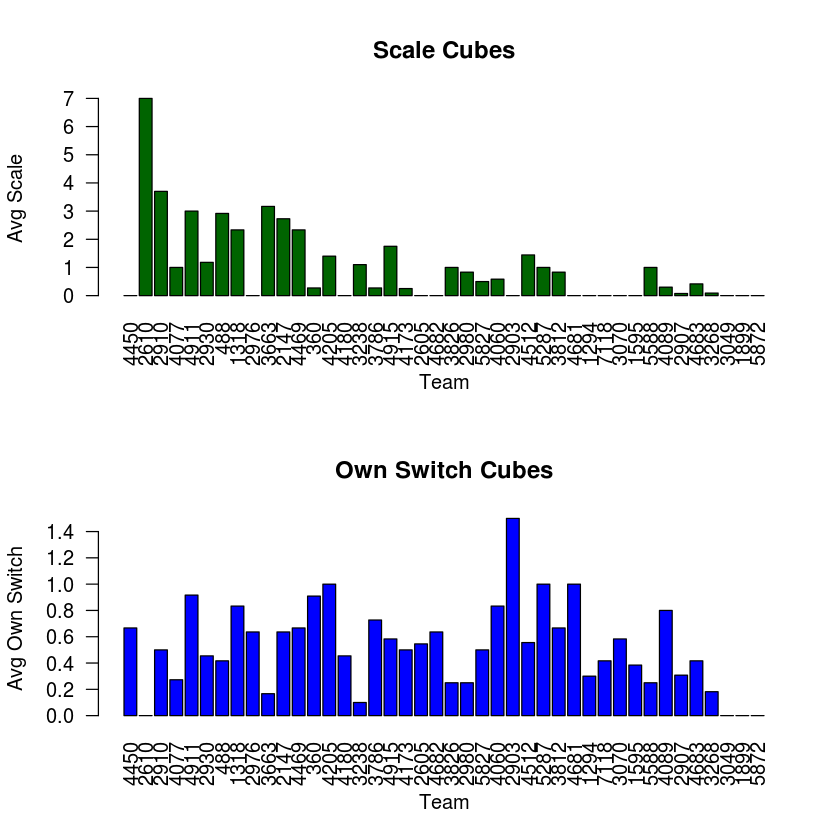

In [5]:
par(mfrow=c(2,1))
plot_scale_cubes(mv_data)
plot_own_switch_cubes(mv_data)

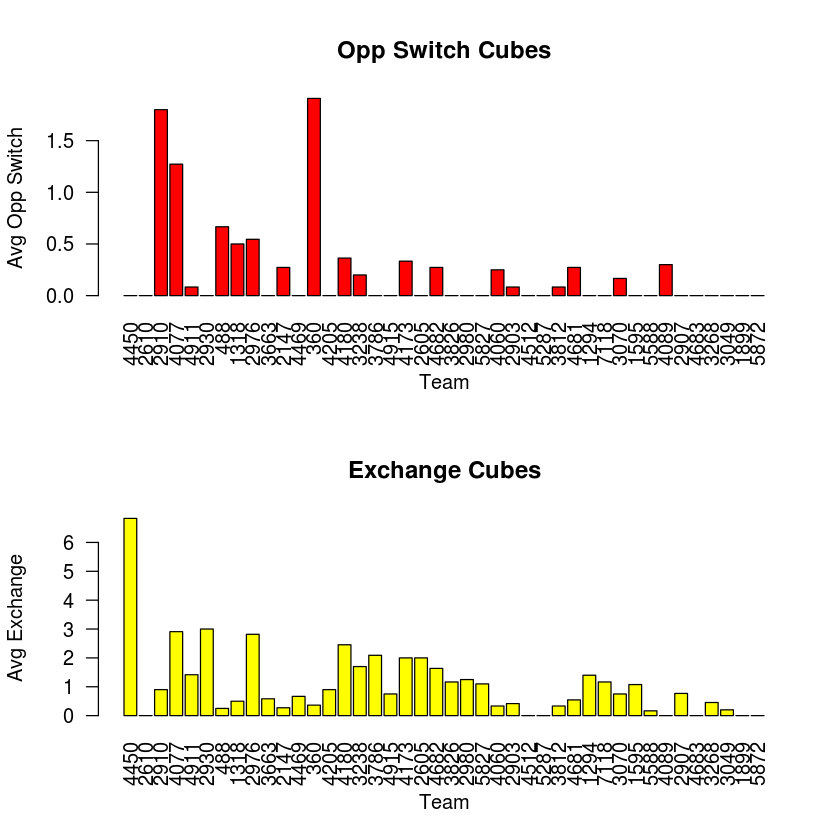

In [6]:
par(mfrow=c(2,1))
plot_opp_switch_cubes(mv_data)
plot_exchange_cubes(mv_data)

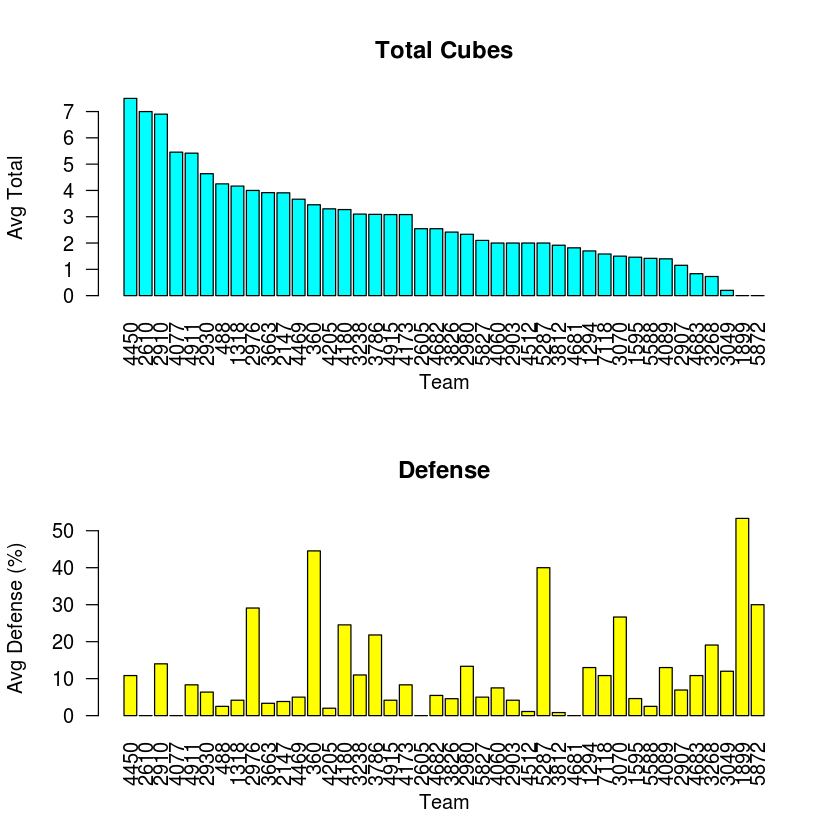

In [7]:
par(mfrow=c(2,1))
plot_total_cubes(mv_data)
plot_defense(mv_data)